Hierarchical Clustering

Рассмотрим метод для определения оптиального числа кластеров - метод дерева решений. Импортируем библиотеки, данные и модули.

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Importing the dataset
df = pd.read_csv('vehicleprice_prep3.csv')

Выведем данные на экран чтобы убедиться в правильности отображения. Имеем 8 колонок и 1940 строк.

In [12]:
df

,brand,year,body,car_mileage,fuel,power,transmission,price
0,ford,2006,other,220,diesel,2.0,manual,0
1,renault,2017,other,211,diesel,2.3,manual,1
2,opel,2015,other,157,diesel,1.6,manual,1
3,ford,2000,other,300,diesel,2.4,manual,0
4,volkswagen,2002,other,270,diesel,2.5,manual,0
...,...,...,...,...,...,...,...,...
1935,renault,2005,liftback,311,diesel,1.9,manual,0
1936,skoda,2009,liftback,201,diesel,2.0,manual,0
1937,audi,2012,liftback,199,petrol,1.8,automatic,1
1938,skoda,2008,liftback,226,gas,1.6,manual,0


В нашем датасете присутствуют качественные переменные. Их необходимо закодировать с помощью функции.
Запишем список нечисловых переменных и проведем кодирование качественных переменных. Результат запишем обратно в базу.

In [13]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [14]:
# Encoding categorical data
df = encoding_char(df)

Посмотрим, как будут выглядеть наши закодированные данные. Теперь все переменные в ней являются числовыми. 
С ними можно теперь работать.

In [15]:
df

,brand,year,body,car_mileage,fuel,power,transmission,price
0,0,2006,0,220,0,2.0,0,0
1,1,2017,0,211,0,2.3,0,1
2,2,2015,0,157,0,1.6,0,1
3,0,2000,0,300,0,2.4,0,0
4,3,2002,0,270,0,2.5,0,0
...,...,...,...,...,...,...,...,...
1935,1,2005,10,311,0,1.9,0,0
1936,10,2009,10,201,0,2.0,0,0
1937,12,2012,10,199,1,1.8,1,1
1938,10,2008,10,226,2,1.6,0,0


Осуществлять работу с выбросами мы не будем, т.к.в дальнейшем они могут оказаться значимыми.

Отшкалируем данные, используя MinMaxScaler, переведя наши данные в диапазон от 0 до 1 с округлением.  Используем мин-макс шкалирование т.к. он не внесет никаких дополнительных изменений. Вывыдем результат в таблицу, подписав соответственно названия столбцов.

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['brand','year','body','car_mileage','fuel','power','transmission','price']).round()

,brand,year,body,car_mileage,fuel,power,transmission,price
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1935,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1936,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1937,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1938,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


Используем способ дерева решений или дендрограммы для определения количества кластеров

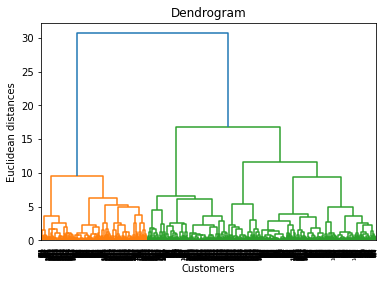

In [17]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Как видим, тут можно выделить два кластера, также можно разбить и на три кластера. Но существует вариант деления на 4 и 6 кластеров. 

Проведем деление на 6 кластеров. Из-за слишком большего количества данных у нас не представляется возможным вывести их все на экран.

In [18]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [19]:
hc

array([0, 4, 4, ..., 1, 3, 3], dtype=int64)

Так как мы ранее убедились в том, что удаление незначимых параметров не меняют значимость выборки, имеем право оставить исходное количество переменных.

Запишем наше деление на 6 кластеров в новый датасет с расширением .pkl для возможности дальнейшего сравнения.

In [20]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('vehicleprice_prepar.pkl', 'wb')
pickle.dump(obj, output, 5)
output.close()